In [13]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('/content/User_explorer_with_variant.csv')

In [14]:
##conducting t-tests on the three data respectively
metrics = ["Engagement rate", "Elapsed time (seconds)", "Event count"]

for metric in metrics:
    group_A = df[df["Assigned_variant"] == "A"][metric].dropna()
    group_B = df[df["Assigned_variant"] == "B"][metric].dropna()

    t_stat, p_val_two_tailed = st.ttest_ind(group_A, group_B, equal_var=False)

    if group_B.mean() > group_A.mean():
        p_val_one_tailed = p_val_two_tailed / 2
    else:
        p_val_one_tailed = 1 - (p_val_two_tailed / 2)

    print(f"\nMetric: {metric}")
    print(f"Mean (A): {group_A.mean():.2f}, Mean (B): {group_B.mean():.2f}")
    print(f"t-statistic: {t_stat:.3f}")
    print(f"Two-tailed p-value: {p_val_two_tailed:.4f}")
    print(f"One-tailed p-value (B > A): {p_val_one_tailed:.4f}")


Metric: Engagement rate
Mean (A): 0.47, Mean (B): 0.37
t-statistic: 1.227
Two-tailed p-value: 0.2219
One-tailed p-value (B > A): 0.8891

Metric: Elapsed time (seconds)
Mean (A): 1.96, Mean (B): 2.52
t-statistic: -0.278
Two-tailed p-value: 0.7815
One-tailed p-value (B > A): 0.3907

Metric: Event count
Mean (A): 19.94, Mean (B): 30.34
t-statistic: -0.687
Two-tailed p-value: 0.4933
One-tailed p-value (B > A): 0.2467



Metric: Engagement rate (Outliers Removed)
Mean (A): 0.4692, Mean (B): 0.3699
t-statistic: 1.2275
Two-tailed p-value: 0.2219
One-tailed p-value (B > A): 0.8891


<ipython-input-18-bb219c9ba57e>:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_A_clean, group_B_clean], labels=["A", "B"])


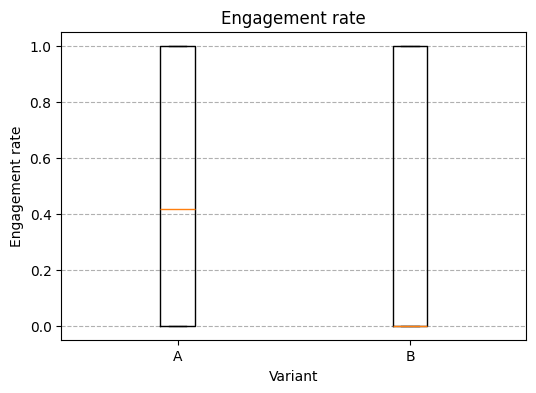


Metric: Elapsed time (seconds) (Outliers Removed)
Mean (A): 0.1516, Mean (B): 0.1352
t-statistic: 0.6501
Two-tailed p-value: 0.5172
One-tailed p-value (B > A): 0.7414


<ipython-input-18-bb219c9ba57e>:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_A_clean, group_B_clean], labels=["A", "B"])


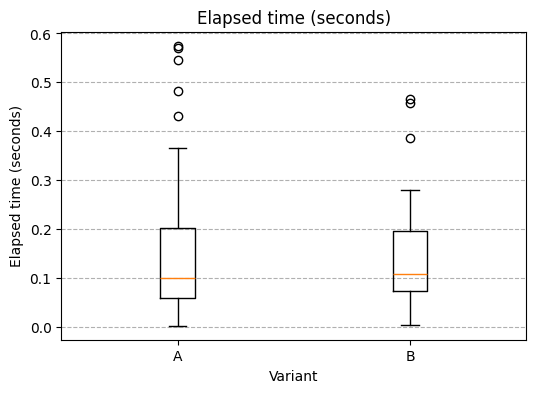


Metric: Event count (Outliers Removed)
Mean (A): 7.4386, Mean (B): 6.0500
t-statistic: 1.4672
Two-tailed p-value: 0.1453
One-tailed p-value (B > A): 0.9273


<ipython-input-18-bb219c9ba57e>:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_A_clean, group_B_clean], labels=["A", "B"])


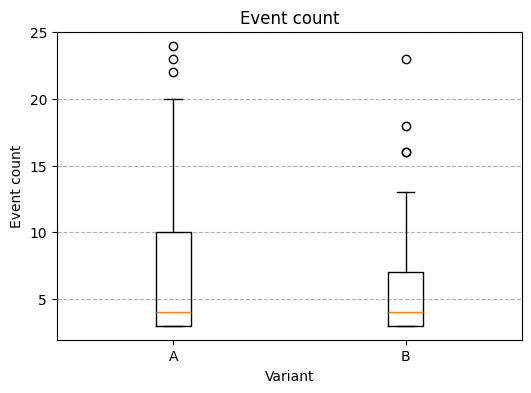

In [18]:
##after removing the outliers

def remove_outliers(df, column):
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for metric in metrics:
    df_clean = remove_outliers(df, metric)
    group_A_clean = df_clean[df_clean["Assigned_variant"] == "A"][metric].dropna()
    group_B_clean = df_clean[df_clean["Assigned_variant"] == "B"][metric].dropna()

    t_stat, p_val_two_tailed = st.ttest_ind(group_A_clean, group_B_clean, equal_var=False)

    p_val_one_tailed = p_val_two_tailed / 2 if group_B_clean.mean() > group_A_clean.mean() else 1 - (p_val_two_tailed / 2)

    print(f"\nMetric: {metric} (Outliers Removed)")
    print(f"Mean (A): {group_A_clean.mean():.4f}, Mean (B): {group_B_clean.mean():.4f}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"Two-tailed p-value: {p_val_two_tailed:.4f}")
    print(f"One-tailed p-value (B > A): {p_val_one_tailed:.4f}")

    plt.figure(figsize=(6, 4))
    plt.boxplot([group_A_clean, group_B_clean], labels=["A", "B"])
    plt.title(f"{metric}")
    plt.ylabel(metric)
    plt.xlabel("Variant")
    plt.grid(axis='y', linestyle='--')
    plt.show()